In [2]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import sys
sys.path.append("/Users/derekdewald/Documents/Python/Github_Repo/d_py_functions")

from DataSets import iris_df

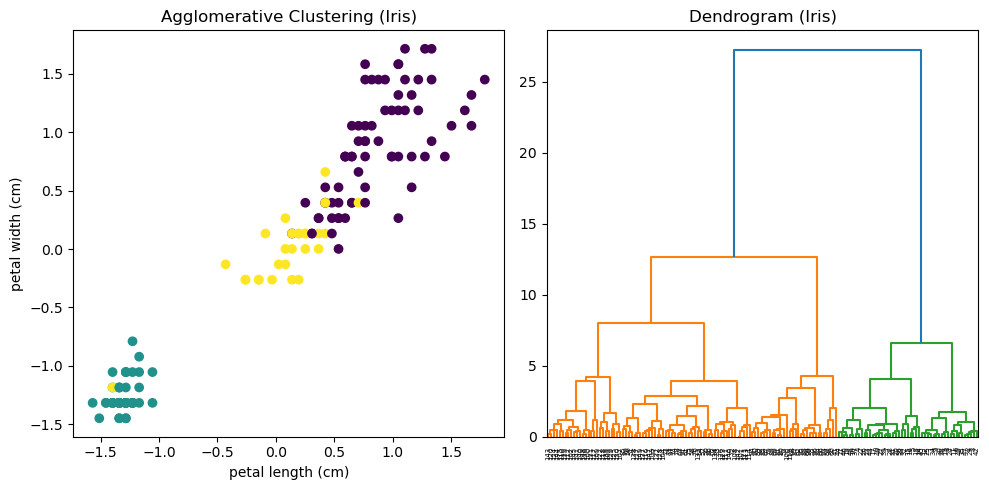

In [16]:
X = iris_df.drop('Target',axis=1).to_numpy()
X_scaled = StandardScaler().fit_transform(X)

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)
feature_names = iris_df.drop('Target',axis=1).columns.tolist()

# 3. Plot the resulting clusters in 2D (using 2 features for simplicity)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Iris)")
plt.xlabel(feature_names[2])  # petal length
plt.ylabel(feature_names[3])  # petal width

# 4. Create linkage matrix and plot dendrogram
linked = linkage(X_scaled, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram (Iris)")
plt.tight_layout()
plt.show()